In [2]:
import numpy as np
import cvxpy as cvx
from copy import copy
from itertools import product
from pympc.geometry.polytope import Polytope
import matplotlib.pyplot as plt

In [2]:
def maximum_volume_box_inscribed_polytope(A, b):
    A_pos = np.maximum(np.zeros(A.shape), A)
    m, d = A.shape
    x = cvx.Variable(d, 1)
    y = cvx.Variable(d, 1)
    y_sum = sum([cvx.log(y[i,0]) for i in range(d)])
    objective = cvx.Maximize(y_sum)
    constraints = [A*x + A_pos*y <= b]
    prob = cvx.Problem(objective, constraints)
    result = prob.solve(solver=cvx.CVXOPT)
    x = np.array(x.value)
    y = np.array(y.value)
    print 'check:', np.max(A.dot(x)-b), np.max(A.dot(x+y)-b), 
    return x, x+y

In [3]:
n_var = 2
n_cons = 10
residual_dimensions = [0,1]
A = np.random.randn(n_cons, n_var)
b = np.random.rand(n_cons, 1)
poly = Polytope(A, b).assemble()

check: -0.08461234769 2.27494134641e-11

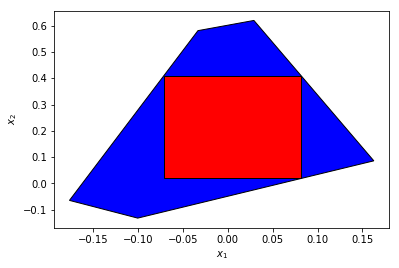

In [4]:
lb, ub = maximum_volume_box_inscribed_polytope(A, b)
box = Polytope.from_bounds(lb, ub)
box.assemble()
poly.plot(facecolor='b')
box.plot(facecolor='r')
plt.show()